
# Bike Sharing Prediction 


In [116]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [21]:
train_df = pd.read_csv('train.csv')
train_df['data_set'] = 'train'
train_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16,train
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40,train
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32,train
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13,train
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1,train


In [22]:
test_df = pd.read_csv('test.csv')
test_df['data_set'] = 'test'
test_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,data_set
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55,test
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54,test
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20,test
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15,test
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7,test


In [23]:
# combine train and test data into one df
test_df['registered'] = 0
test_df['casual'] = 0
test_df['count'] = 0

all_df = pd.concat([train_df, test_df])
all_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16,train
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40,train
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32,train
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13,train
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1,train


In [24]:
all_df.tail(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set
4394,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60.0,11.0014,0,0,0,test
4395,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60.0,11.0014,0,0,0,test
4396,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60.0,11.0014,0,0,0,test
4397,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56.0,8.9981,0,0,0,test
4398,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65.0,8.9981,0,0,0,test


In [25]:
# lowercase column names
all_df.columns = map(str.lower, all_df.columns)
all_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'data_set'],
      dtype='object')

In [26]:
# parse datetime colum & add new time related columns
dt = pd.DatetimeIndex(all_df['datetime'])
all_df.set_index(dt, inplace=True)

In [27]:
all_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16,train
2011-01-01 01:00:00,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40,train
2011-01-01 02:00:00,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32,train
2011-01-01 03:00:00,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13,train
2011-01-01 04:00:00,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1,train


In [28]:
# Indexing by datetime let's us to select rows by specifying time ranges
all_df['2011-01-01 01:00:00':'2011-01-01 03:00:00']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set
datetime,,,,,,,,,,,,,
2011-01-01 01:00:00,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40,train
2011-01-01 02:00:00,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32,train
2011-01-01 03:00:00,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13,train


In [29]:
# find missing values in dataset if any
all_df.isnull().values.sum()

0

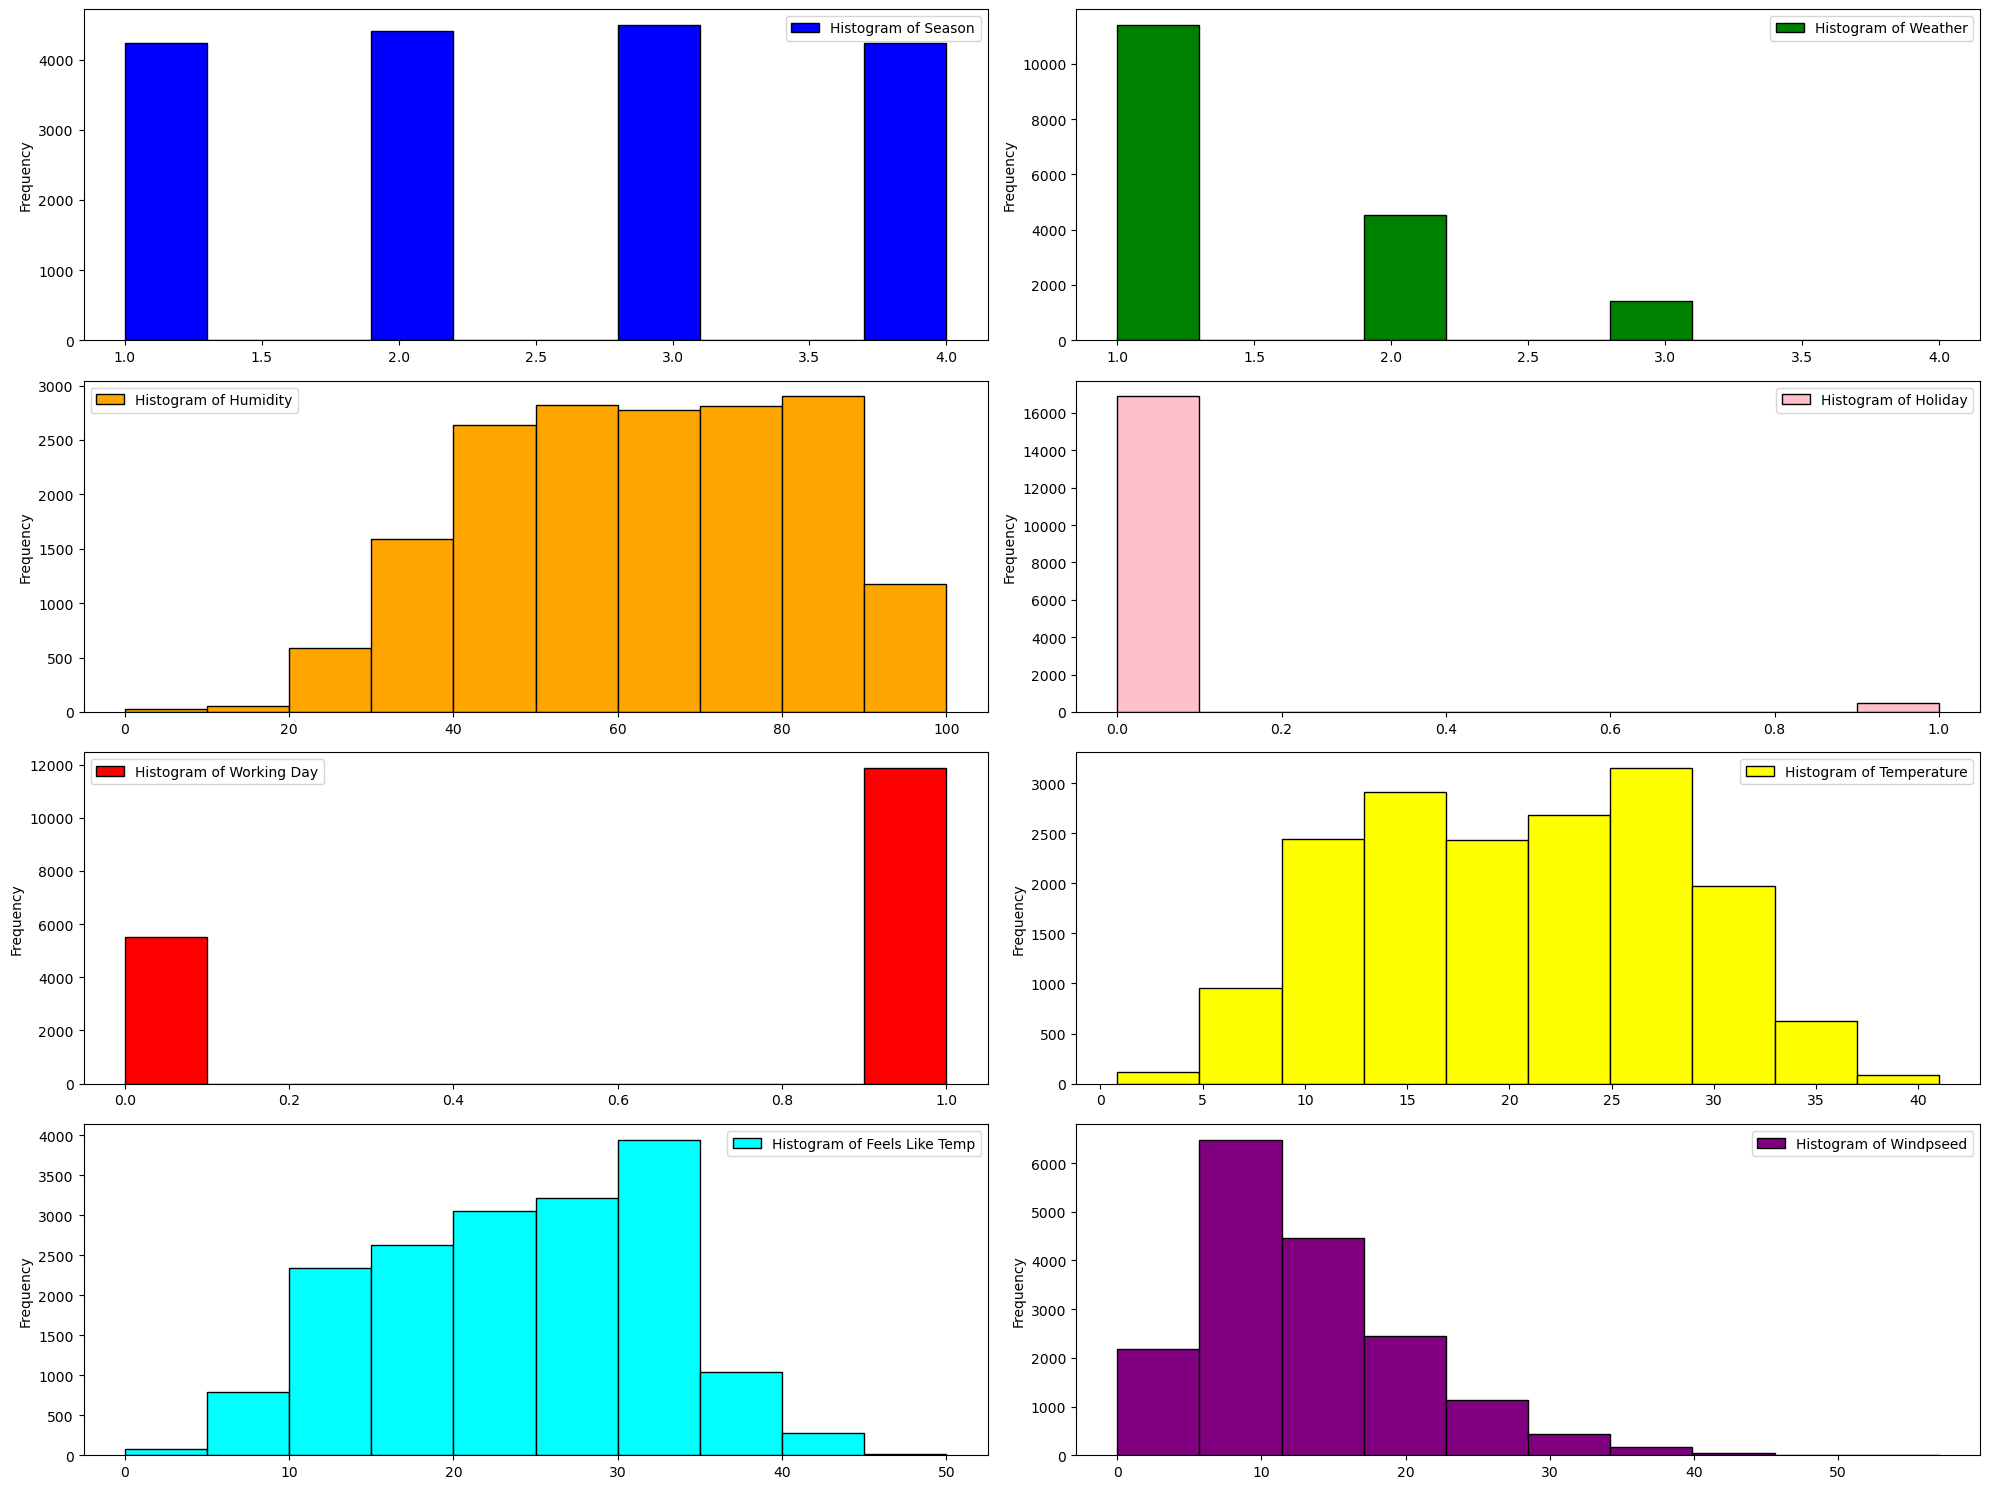

In [30]:
plt.figure(figsize=(20,15))
plt.subplot(421)
all_df['season'].plot.hist(bins=10, color='blue', label='Histogram of Season', edgecolor='black')
plt.legend(loc='best')
plt.subplot(422)
all_df['weather'].plot.hist(bins=10, color='green', label='Histogram of Weather', edgecolor='black')
plt.legend(loc='best')
plt.subplot(423)
all_df['humidity'].plot.hist(bins=10, color='orange', label='Histogram of Humidity', edgecolor='black')
plt.legend(loc='best')
plt.subplot(424)
all_df['holiday'].plot.hist(bins=10, color='pink', label='Histogram of Holiday', edgecolor='black')
plt.legend(loc='best')
plt.subplot(425)
all_df['workingday'].plot.hist(bins=10, color='red', label='Histogram of Working Day', edgecolor='black')
plt.legend(loc='best')
plt.subplot(426)
all_df['temp'].plot.hist(bins=10, color='yellow', label='Histogram of Temperature', edgecolor='black')
plt.legend(loc='best')
plt.subplot(427)
all_df['atemp'].plot.hist(bins=10, color='cyan', label='Histogram of Feels Like Temp', edgecolor='black')
plt.legend(loc='best')
plt.subplot(428)
all_df['windspeed'].plot.hist(bins=10, color='purple', label='Histogram of Windpseed', edgecolor='black')
plt.legend(loc='best')
plt.tight_layout();

In [31]:
# logarithmic transformation of dependent cols
# (adding 1 first so that 0 values don't become -inf)
for col in ['casual', 'registered', 'count']:
    all_df['%s_log' % col] = np.log(all_df[col] + 1)

In [32]:
all_df['date'] = dt.date
all_df['day'] = dt.day
all_df['month'] = dt.month
all_df['year'] = dt.year
all_df['hour'] = dt.hour
all_df['dow'] = dt.dayofweek
all_df['woy'] = dt.weekofyear

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8124\944767597.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  all_df['woy'] = dt.weekofyear


In [33]:
# How many columns have null values
all_df.isnull().sum()

datetime          0
season            0
holiday           0
workingday        0
weather           0
temp              0
atemp             0
humidity          0
windspeed         0
casual            0
registered        0
count             0
data_set          0
casual_log        0
registered_log    0
count_log         0
date              0
day               0
month             0
year              0
hour              0
dow               0
woy               0
dtype: int64

In [34]:
# interpolate weather, temp, atemp, humidity, windspeed
all_df["weather"] = all_df["weather"].interpolate(method='time').apply(np.round)
all_df["temp"] = all_df["temp"].interpolate(method='time')
all_df["atemp"] = all_df["atemp"].interpolate(method='time')
all_df["humidity"] = all_df["humidity"].interpolate(method='time').apply(np.round)
all_df["windspeed"] = all_df["windspeed"].interpolate(method='time')

In [35]:
# add a count_season column using join
by_season = all_df[all_df['data_set'] == 'train'].copy().groupby(['season'])[['count']].agg(sum)
by_season.columns = ['count_season']
all_df = all_df.join(by_season, on='season')

In [36]:
print(by_season)

        count_season
season              
1             450740
2             918589
3             479694
4             326137


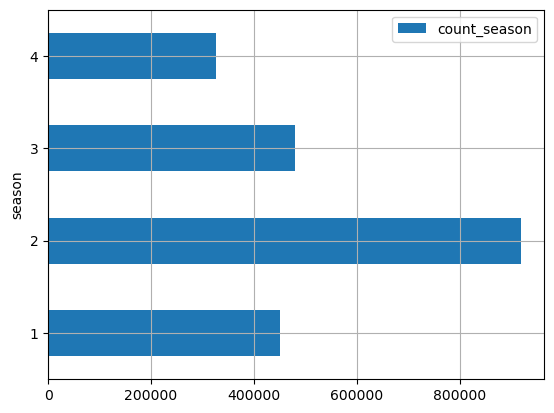

In [41]:
by_season.plot(kind='barh')
plt.grid(True)
plt.show();

In [44]:
def get_day(day_start):
    day_end = day_start + pd.offsets.DateOffset(hours=23)
    return pd.date_range(day_start, day_end, freq="H")

# tax day
all_df.loc[get_day(pd.datetime(2011, 4, 15)), "workingday"] = 1
all_df.loc[get_day(pd.datetime(2012, 4, 16)), "workingday"] = 1

# thanksgiving friday
all_df.loc[get_day(pd.datetime(2011, 11, 25)), "workingday"] = 0
all_df.loc[get_day(pd.datetime(2012, 11, 23)), "workingday"] = 0

# tax day
all_df.loc[get_day(pd.datetime(2011, 4, 15)), "holiday"] = 0
all_df.loc[get_day(pd.datetime(2012, 4, 16)), "holiday"] = 0

# thanksgiving friday
all_df.loc[get_day(pd.datetime(2011, 11, 25)), "holiday"] = 1
all_df.loc[get_day(pd.datetime(2012, 11, 23)), "holiday"] = 1

#storms
all_df.loc[get_day(pd.datetime(2012, 5, 21)), "holiday"] = 1

#tornado
all_df.loc[get_day(pd.datetime(2012, 6, 1)), "holiday"] = 1by_hour = all_df[all_df['data_set'] == 'train'].copy().groupby(['hour', 'workingday'])['count'].agg('sum').unstack()
by_hour.head(10)

SyntaxError: invalid syntax (2194644201.py, line 25)

In [45]:
by_hour = all_df[all_df['data_set'] == 'train'].copy().groupby(['hour', 'workingday'])['count'].agg('sum').unstack()
by_hour.head(10)

workingday,0,1
hour,,
0,13565,12065
1,10252,5582
2,7912,2907
3,3929,1579
4,1197,1631
5,1226,7691
6,2825,33179
7,6509,93994
8,15654,156079


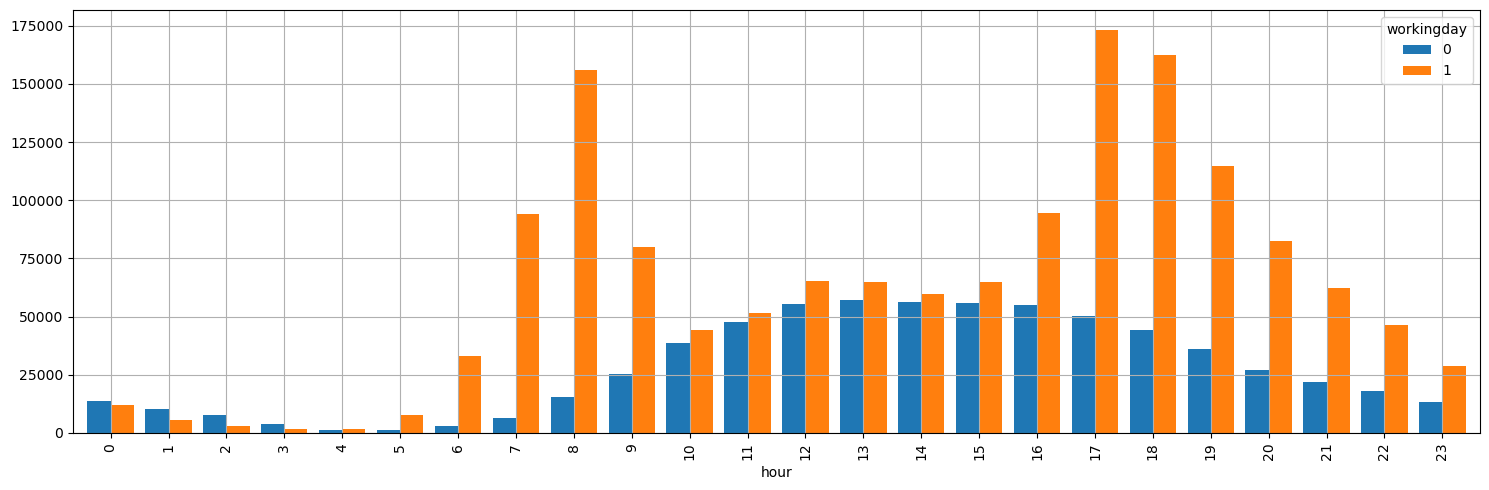

In [46]:
# rentals by hour, split by working day (or not)
by_hour.plot(kind='bar', figsize=(15,5), width=0.8);
plt.grid(True)
plt.tight_layout();

In [47]:
train_df = all_df[all_df['data_set'] == 'train'].copy()

In [48]:
#train_df.boxplot(column='count', by='hour', figsize=(15,5))
#plt.ylabel('Count of Users')
#plt.title("Boxplot of Count grouped by hour")
#plt.suptitle("") # get rid of the pandas autogenerated title

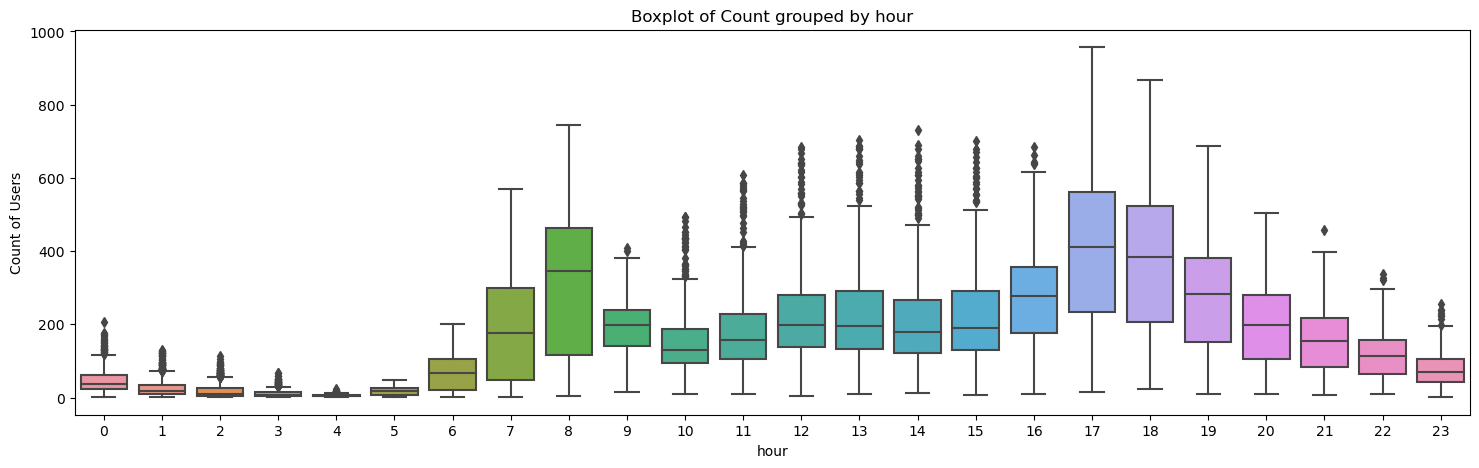

In [49]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x=train_df['hour'], y=train_df['count'], ax=ax)
ax.set_ylabel('Count of Users')
ax.set_title("Boxplot of Count grouped by hour");
#plt.suptitle("") # get rid of the pandas autogenerated title

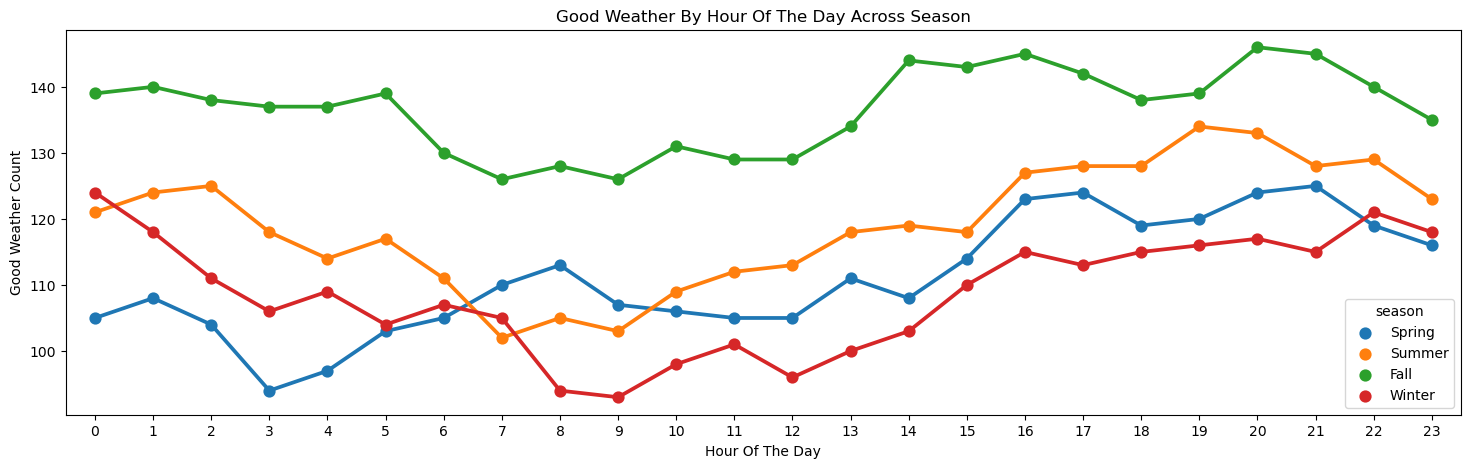

In [50]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
good_weather = all_df[all_df['weather'] == 1][['hour', 'season']].copy()
data = pd.DataFrame({'count' : good_weather.groupby(["hour","season"]).size()}).reset_index()
data['season'] = data['season'].map(lambda d : season_map[d])

fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["count"], hue=data["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Good Weather Count', title="Good Weather By Hour Of The Day Across Season");

In [51]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
normal_weather = all_df[all_df['weather'] == 3][['hour', 'season']].copy()
data = pd.DataFrame({'count' : normal_weather.groupby(["hour","season"]).size()}).reset_index()
data['season'] = data['season'].map(lambda d : season_map[d])

In [52]:
data.sample(n=5)

,hour,season,count
53,13,Summer,18
44,11,Spring,11
11,2,Winter,11
43,10,Winter,17
5,1,Summer,15


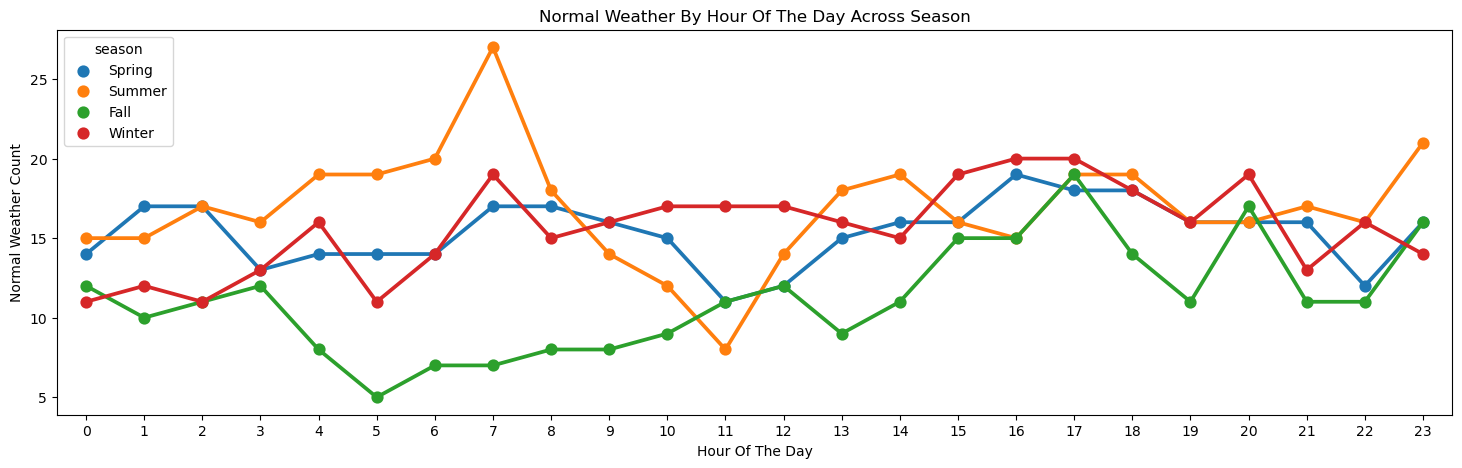

In [53]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["count"], hue=data["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Normal Weather Count', title="Normal Weather By Hour Of The Day Across Season");

In [54]:
data = pd.pivot_table(data, values='count', columns='season', index='hour')
data.sample(5)

season,Fall,Spring,Summer,Winter
hour,,,,
18,14,18,19,18
7,7,17,27,19
1,10,17,15,12
10,9,15,12,17
6,7,14,20,14


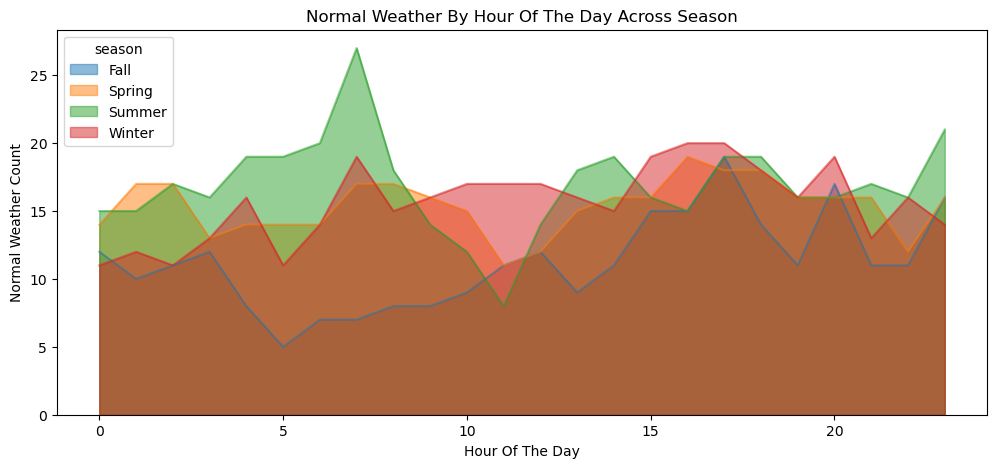

In [55]:
fig, ax = plt.subplots(figsize=(12, 5))
data.plot.area(stacked=False, ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Normal Weather Count', title="Normal Weather By Hour Of The Day Across Season");

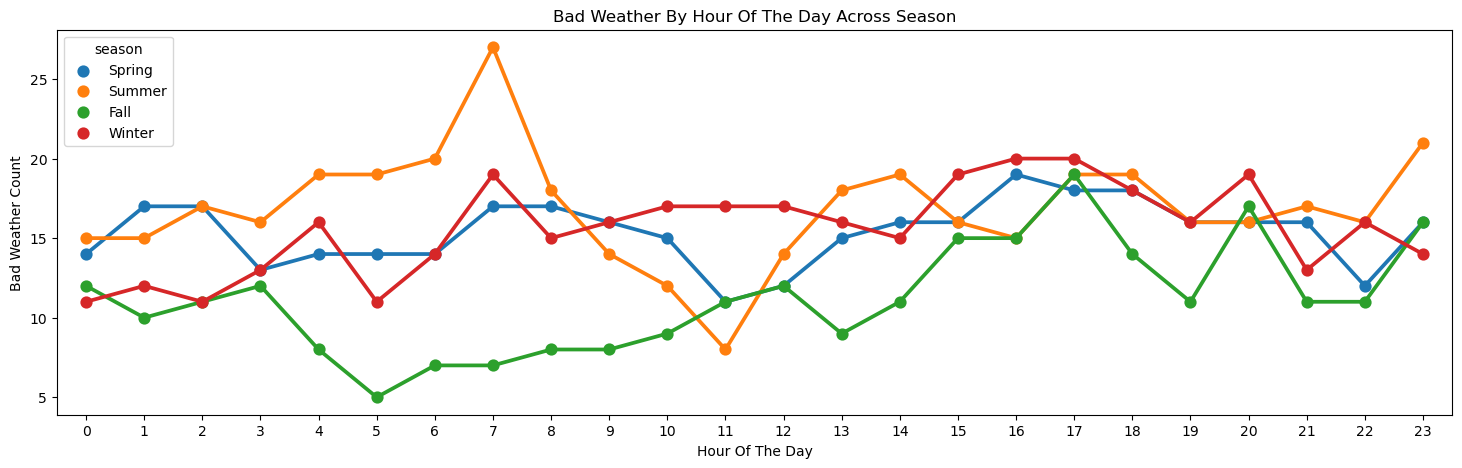

In [56]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
bad_weather = all_df[all_df['weather'] == 3][['hour', 'season']].copy()
data = pd.DataFrame({'count' : bad_weather.groupby(["hour","season"]).size()}).reset_index()
data['season'] = data['season'].map(lambda d : season_map[d])

fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["count"], hue=data["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Bad Weather Count', title="Bad Weather By Hour Of The Day Across Season");

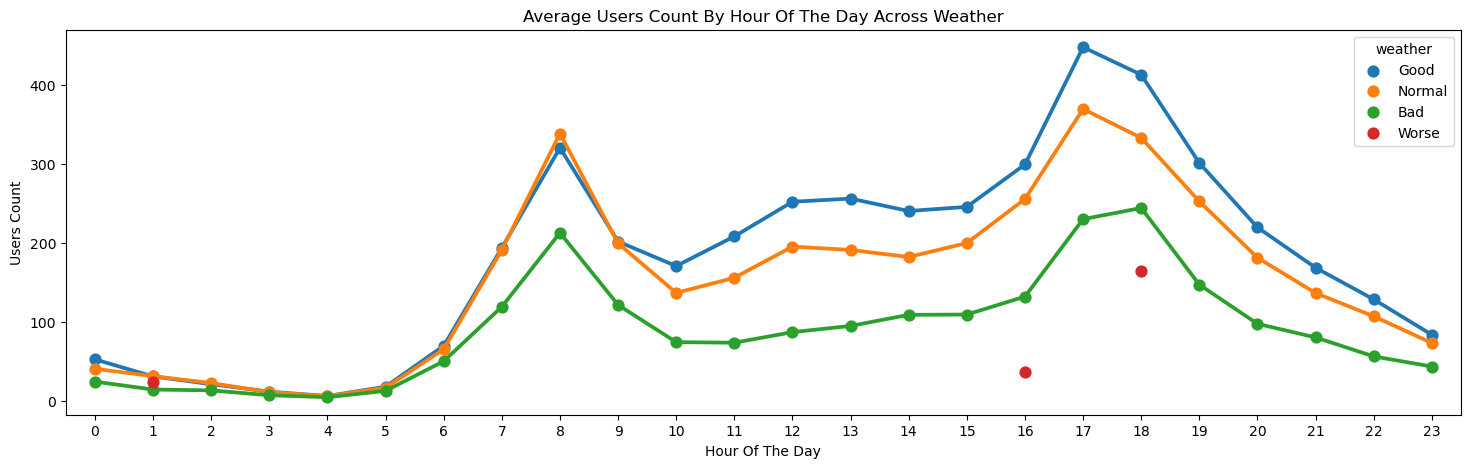

In [57]:
weather_map = {1:'Good', 2:'Normal', 3:'Bad', 4:'Worse'}
data = pd.DataFrame(train_df.groupby(["hour","weather"], sort=True)["count"].mean()).reset_index()
data['weather'] = data['weather'].map(lambda d : weather_map[d])
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["count"], hue=data["weather"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count', title="Average Users Count By Hour Of The Day Across Weather");

In [58]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
data = pd.DataFrame({'mean':train_df.groupby(["hour","season"], sort=True)["count"].mean()}).reset_index()
data['season'] = data['season'].map(lambda d : season_map[d])

In [59]:
data.sample(n=5)

,hour,season,mean
79,19,Winter,232.078652
58,14,Fall,231.582524
94,23,Fall,103.549020
38,9,Fall,204.475728
75,18,Winter,332.393258


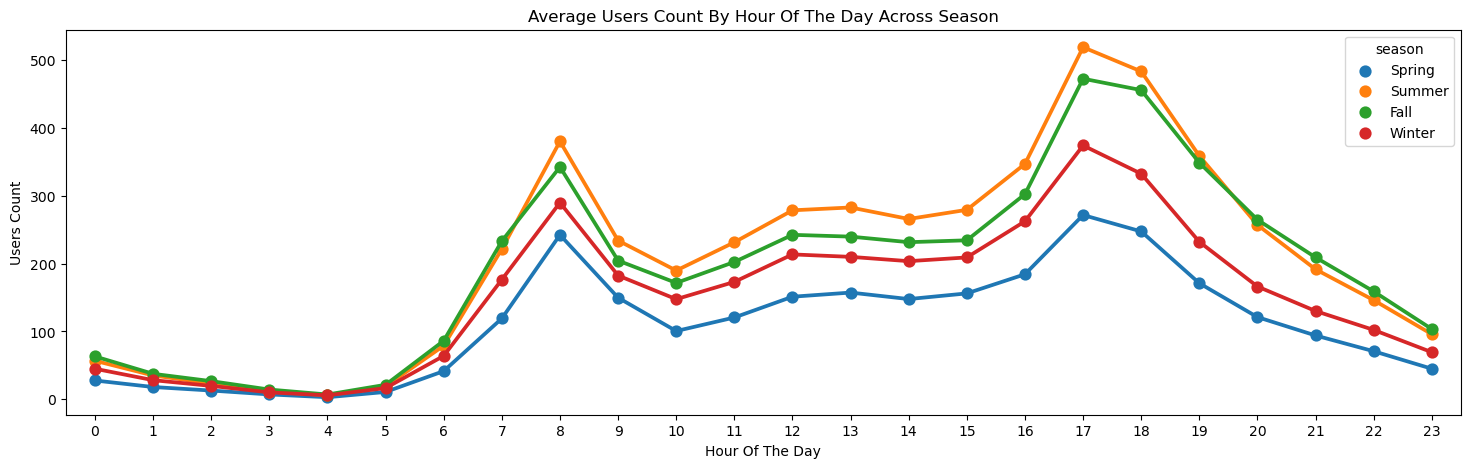

In [60]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["mean"], hue=data["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count', title="Average Users Count By Hour Of The Day Across Season");

In [61]:
day_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
hueOrder = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
data = pd.DataFrame({'mean':train_df.groupby(["hour","dow"], sort=True)["count"].mean()}).reset_index()
data['dow'] = data['dow'].map(lambda d : day_map[d])

In [62]:
data.sample(n=5)

,hour,dow,mean
71,10,Tuesday,115.649351
88,12,Friday,206.448718
41,5,Sunday,7.436620
3,0,Thursday,33.909091
12,1,Saturday,59.064103


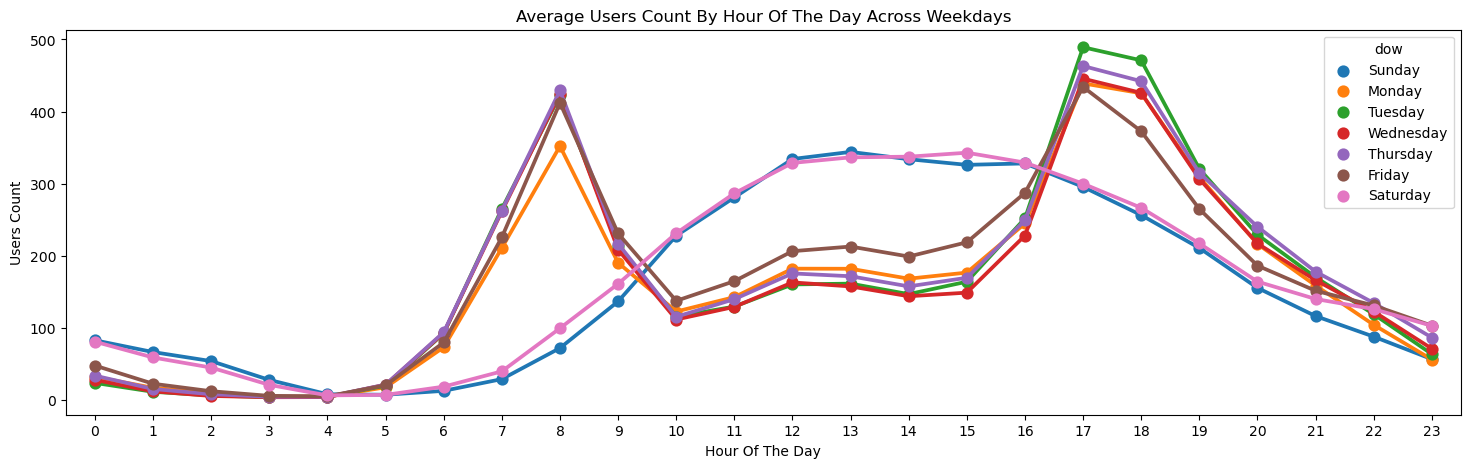

In [63]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["mean"], hue=data["dow"], hue_order=hueOrder, ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count', title="Average Users Count By Hour Of The Day Across Weekdays");

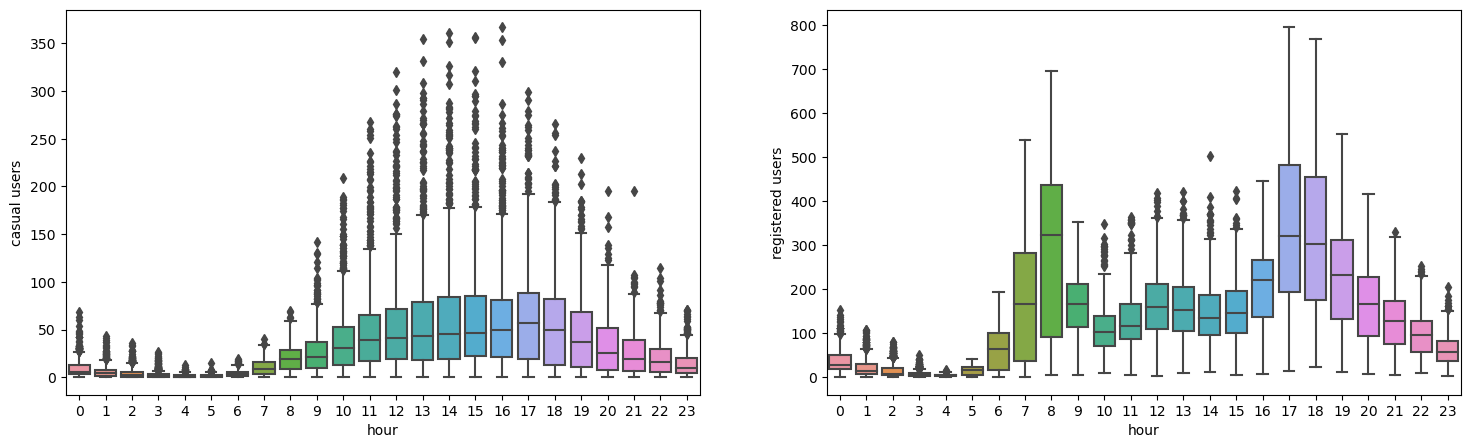

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(18,5), sharex=False, sharey=False)

sns.boxplot(x='hour', y='casual', data=train_df, ax=axs[0])
axs[0].set_ylabel('casual users')
axs[0].set_title('')

sns.boxplot(x='hour', y='registered', data=train_df, ax=axs[1])
axs[1].set_ylabel('registered users')
axs[1].set_title('');

In [65]:
train_df[["hour","casual","registered"]].head(5)

,hour,casual,registered
datetime,,,
2011-01-01 00:00:00,0,3,13
2011-01-01 01:00:00,1,8,32
2011-01-01 02:00:00,2,5,27
2011-01-01 03:00:00,3,3,10
2011-01-01 04:00:00,4,0,1


In [66]:
pd.melt(train_df[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'], var_name='usertype', value_name='count').head(5)

,hour,usertype,count
0,0,casual,3
1,1,casual,8
2,2,casual,5
3,3,casual,3
4,4,casual,0


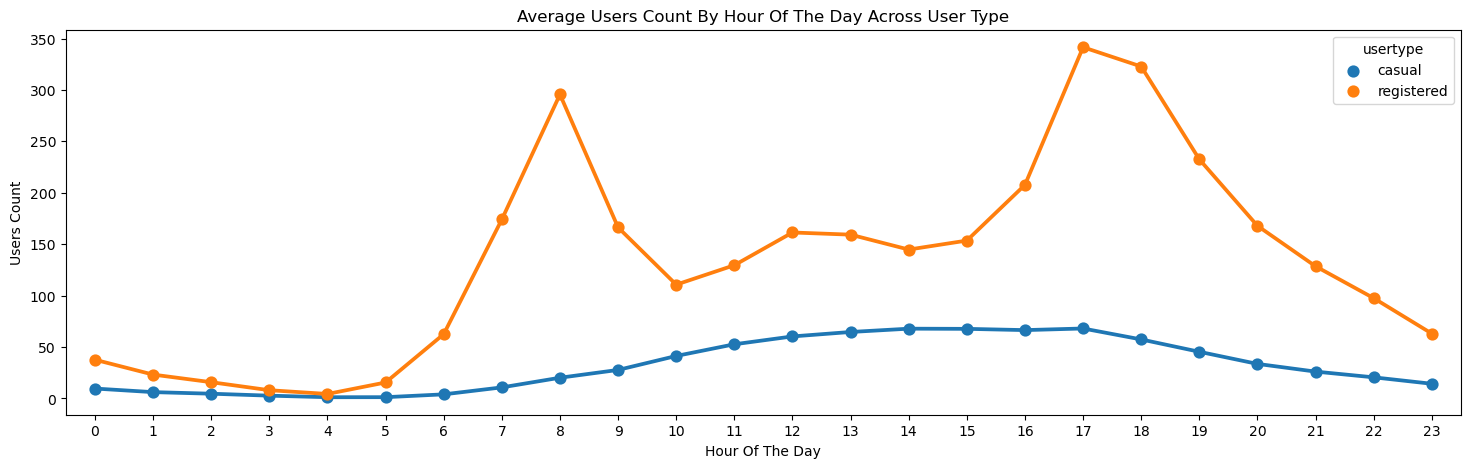

In [67]:
fig, ax = plt.subplots(figsize=(18, 5))
train_df_melt = pd.melt(train_df[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'], var_name='usertype', value_name='count')
data = pd.DataFrame(train_df_melt.groupby(["hour", "usertype"], sort=True)["count"].mean()).reset_index()
sns.pointplot(x=data["hour"], y=data["count"], hue=data["usertype"], hue_order=["casual","registered"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count', title='Average Users Count By Hour Of The Day Across User Type');

In [68]:
train_df = train_df.assign(log_count = lambda df : np.log(train_df['count']))

fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x='hour', y='log_count', data=train_df, ax=ax)
ax.set(ylabel='log(count) of Users',title='Boxplot of Log of Count grouped by hour')

#plt.suptitle("") # get rid of the pandas autogenerated title
train_df.drop(['log_count'], axis = 1, inplace=True);def hour_jitter(h):
    #return h + ((np.random.randint(low=0, high=9, size=1)[0] - 4) / 10)
    return h + np.random.uniform(-0.4, 0.4)

SyntaxError: invalid syntax (3874425123.py, line 8)

In [ ]:
def hour_jitter(h):
    #return h + ((np.random.randint(low=0, high=9, size=1)[0] - 4) / 10)
    return h + np.random.uniform(-0.4, 0.4)

In [ ]:
def hour_format(h):
    return "{:02d}:00 AM".format(h) if h <= 12 else "{:02d}:00 PM".format(h%12)

In [ ]:
# jitter plot
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# color_map = plt.get_cmap("jet")
color_map = mcolors.ListedColormap(list(["#5e4fa2", "#3288bd", "#66c2a5", "#abdda4", "#e6f598", "#fee08b", "#fdae61", "#f46d43", "#d53e4f", "#9e0142"]))
train_df['hour_jitter'] = train_df['hour'].map(hour_jitter)
train_df[train_df['workingday'] == 1].plot(kind="scatter", x='hour_jitter', y='count',
    figsize=(18,6),
    c='temp', cmap=color_map, colorbar=True,
    sharex=False)

hours = np.unique(train_df['hour'].values)
hour_labels = [hour_format(h) for h in hours]
plt.xticks(hours, hour_labels, rotation='vertical');train_df.drop('hour_jitter', axis=1, inplace=True);

In [ ]:
train_df.drop('hour_jitter', axis=1, inplace=True);

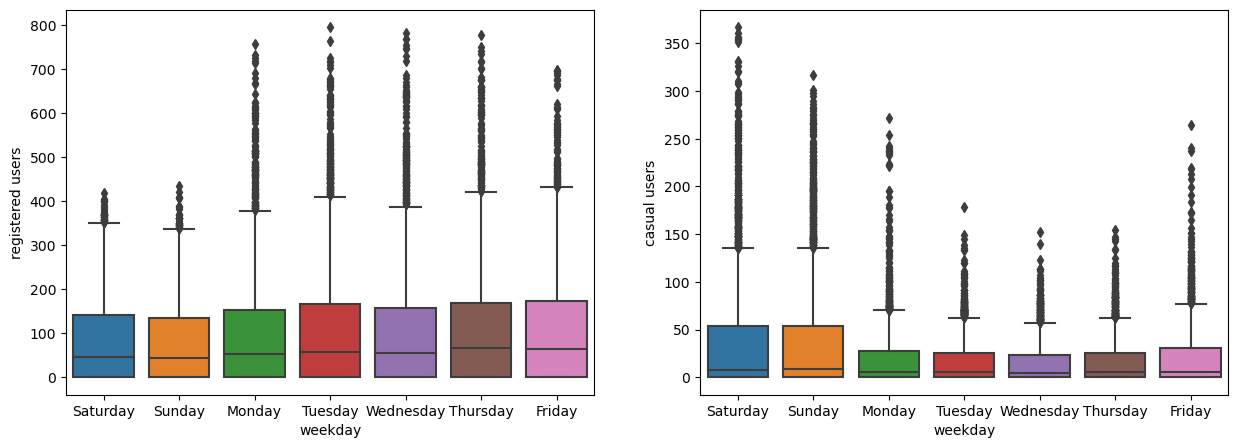

In [69]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
all_df['weekday'] = all_df['dow'].map(dayOfWeek)

fig, axs = plt.subplots(1, 2, figsize=(15,5), sharex=False, sharey=False)

sns.boxplot(x='weekday', y='registered', data=all_df, ax=axs[0])
axs[0].set_ylabel('registered users')
axs[0].set_title('')

sns.boxplot(x='weekday', y='casual', data=all_df, ax=axs[1])
axs[1].set_ylabel('casual users')
axs[1].set_title('')

all_df.drop('weekday', axis=1, inplace=True);

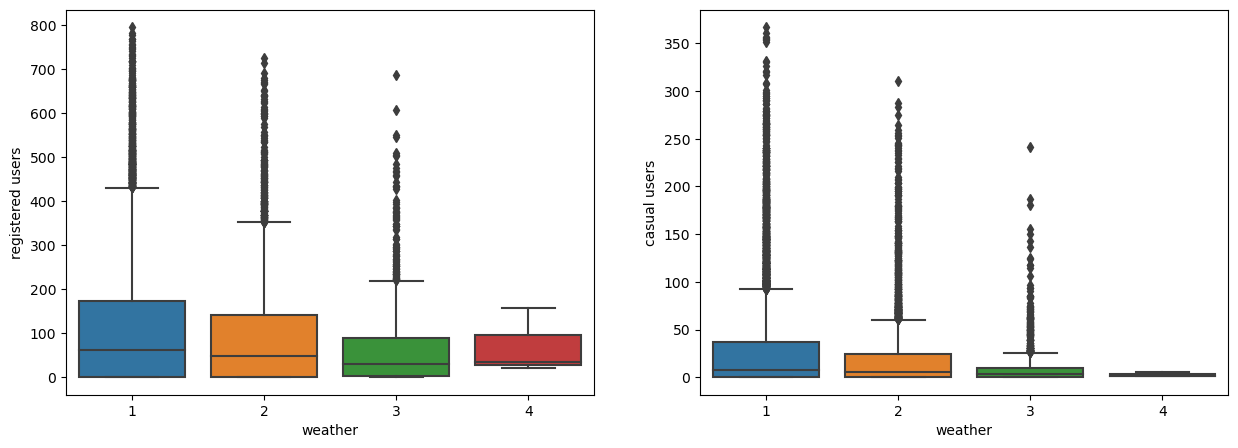

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(15,5), sharex=False, sharey=False)

sns.boxplot(x='weather', y='registered', data=all_df, ax=axs[0])
axs[0].set_ylabel('registered users')
axs[0].set_title('')

sns.boxplot(x='weather', y='casual', data=all_df, ax=axs[1])
axs[1].set_ylabel('casual users')
axs[1].set_title('');

# Correlation between Count and Features 

In [71]:
sub_df = train_df[['count', 'registered', 'casual', 'temp', 'atemp', 'humidity', 'windspeed', 'workingday', 'holiday']]

In [72]:
sub_df.corr()

,count,registered,casual,temp,atemp,humidity,windspeed,workingday,holiday
count,1.000000,0.968329,0.707938,0.415938,0.412644,-0.322269,0.105607,0.018842,-0.029340
registered,0.968329,1.000000,0.509175,0.344451,0.342345,-0.279501,0.100579,0.131819,-0.046053
casual,0.707938,0.509175,1.000000,0.459414,0.454015,-0.320253,0.079524,-0.307930,0.029135
temp,0.415938,0.344451,0.459414,1.000000,0.991839,-0.048478,-0.008669,0.060589,-0.025104
atemp,0.412644,0.342345,0.454015,0.991839,1.000000,-0.031606,-0.049997,0.064840,-0.032903
humidity,-0.322269,-0.279501,-0.320253,-0.048478,-0.031606,1.000000,-0.296975,0.028026,-0.029520
windspeed,0.105607,0.100579,0.079524,-0.008669,-0.049997,-0.296975,1.000000,0.001986,0.021646
workingday,0.018842,0.131819,-0.307930,0.060589,0.064840,0.028026,0.001986,1.000000,-0.248558
holiday,-0.029340,-0.046053,0.029135,-0.025104,-0.032903,-0.029520,0.021646,-0.248558,1.000000


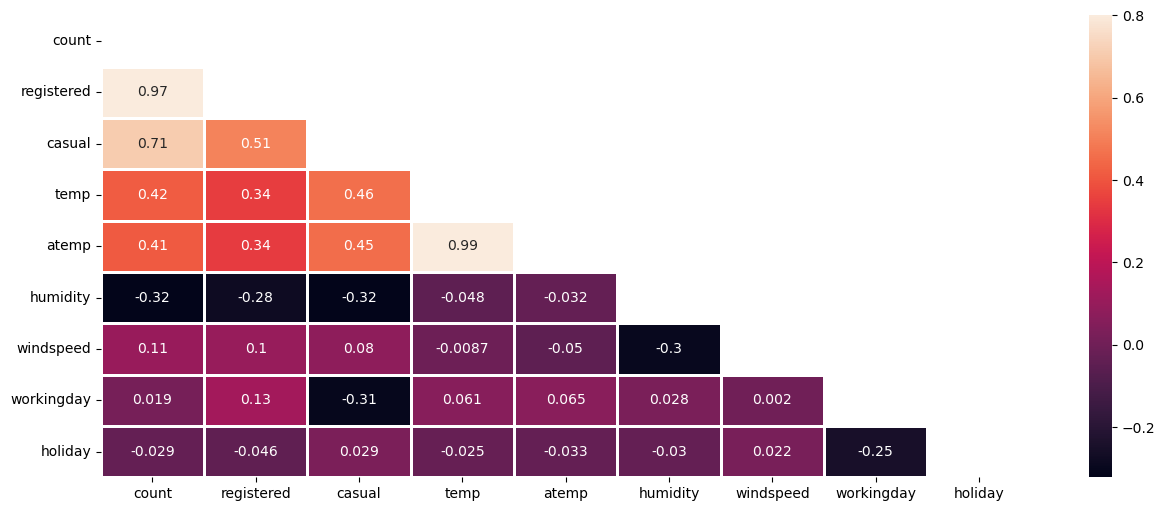

In [73]:
corrMatt = sub_df.corr()
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=False, annot=True, ax=ax, linewidths=1);

# Distribution of data between Train and Test set based on Season

In [74]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
data = all_df[['data_set', 'season']].copy()
data['season'] = data['season'].map(lambda d : season_map[d])

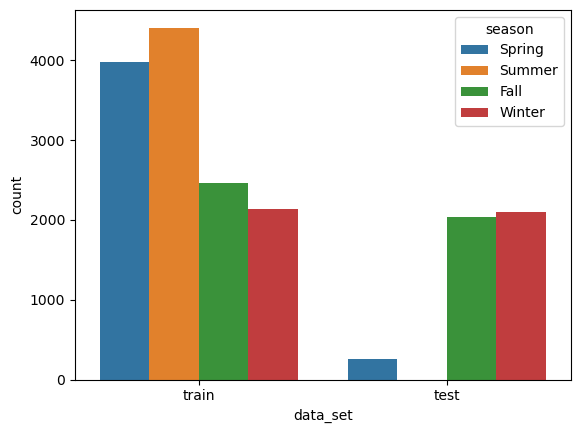

In [75]:
sns.countplot(x="data_set", hue="season", data=data);

# Distribution of data between Train and Test set based on Weather

In [76]:
weather_map = {1:'Good', 2:'Normal', 3:'Bad', 4:'Worse'}
data = all_df[['data_set', 'weather']].copy()
data['weather'] = data['weather'].map(lambda d : weather_map[d])

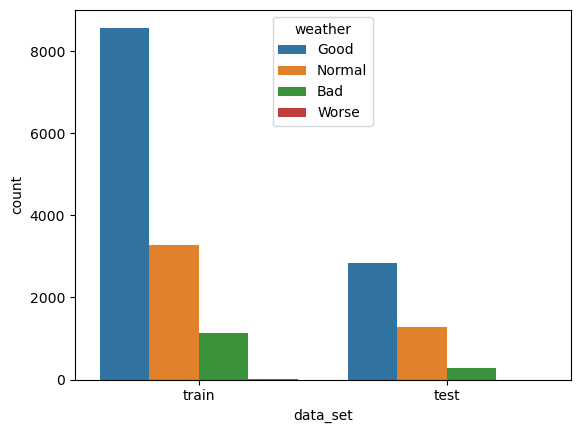

In [77]:
sns.countplot(x="data_set", hue="weather", data=data);

# Distribution of count of users Train and Test set based on Year

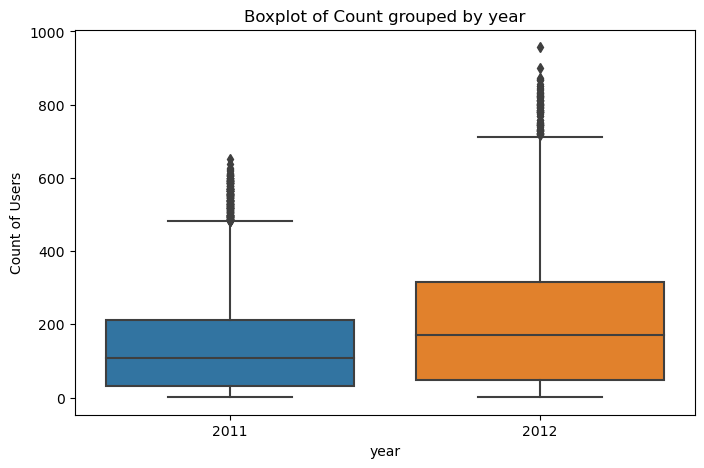

In [78]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='year', y='count', data=train_df)
plt.ylabel('Count of Users')
plt.title("Boxplot of Count grouped by year");

## Feature Engineering

In [79]:
# feature engineer a new column whether its a peak hour or not
all_df['peak'] = all_df[['hour', 'workingday']]\
    .apply(lambda df: 1 if ((df['workingday'] == 1 and (df['hour'] == 8 or 17 <= df['hour'] <= 18)) \
                            or (df['workingday'] == 0 and 10 <= df['workingday'] <= 19)) else 0, axis = 1)

In [80]:
# sandy
all_df['holiday'] = all_df[['month', 'day', 'holiday', 'year']]\
    .apply(lambda df: 1 if (df['year'] == 2012 and df['month'] == 10 and df['day'] == 30) else 0, axis = 1)

# christmas and others
all_df['holiday'] = all_df[['month', 'day', 'holiday']]\
    .apply(lambda df: 1 if (df['month'] == 12 and df['day'] in [24, 26, 31]) else df['holiday'], axis = 1)
all_df['workingday'] = all_df[['month', 'day', 'workingday']]\
    .apply(lambda df: 0 if df['month'] == 12 and df['day'] in [24, 31] else df['workingday'], axis = 1)

In [81]:
# from histogram
all_df['ideal'] = all_df[['temp', 'windspeed']]\
    .apply(lambda df: 1 if (df['temp'] > 27 and df['windspeed'] < 30) else 0, axis = 1)
    
all_df['sticky'] = all_df[['humidity', 'workingday']]\
    .apply(lambda df: 1 if (df['workingday'] == 1 and df['humidity'] >= 60) else 0, axis = 1)

In [82]:
all_df.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,day,month,year,hour,dow,woy,count_season,peak,ideal,sticky
datetime,,,,,,,,,,,,,,,,,,,,,
2012-03-06 22:00:00,2012-03-06 22:00:00,1,0,1,1,11.48,13.635,56.0,11.0014,5,...,6,3,2012,22,1,10,450740,0,0,0
2011-01-30 17:00:00,2011-01-30 17:00:00,1,0,0,1,12.30,14.395,56.0,12.9980,6,...,30,1,2011,17,6,4,450740,0,0,0
2011-11-20 15:00:00,2011-11-20 15:00:00,4,0,0,2,21.32,25.000,68.0,12.9980,109,...,20,11,2011,15,6,46,326137,0,0,0
2012-07-22 11:00:00,2012-07-22 11:00:00,3,0,0,2,27.06,31.060,74.0,0.0000,0,...,22,7,2012,11,6,29,479694,0,1,0
2012-09-09 07:00:00,2012-09-09 7:00:00,3,0,0,1,22.14,25.760,73.0,11.0014,0,...,9,9,2012,7,6,36,479694,0,0,0
2011-11-08 07:00:00,2011-11-08 7:00:00,4,0,1,1,12.30,15.910,87.0,7.0015,7,...,8,11,2011,7,1,45,326137,0,0,1
2012-06-27 21:00:00,2012-06-27 21:00:00,3,0,1,1,30.34,32.575,35.0,8.9981,54,...,27,6,2012,21,2,26,479694,0,1,0
2011-12-27 07:00:00,2011-12-27 7:00:00,1,0,1,2,12.30,14.395,65.0,19.0012,1,...,27,12,2011,7,1,52,450740,0,0,1
2011-09-03 11:00:00,2011-09-03 11:00:00,3,0,0,3,27.06,31.060,69.0,19.0012,66,...,3,9,2011,11,5,35,479694,0,1,0


 # Training Models

In [83]:
# instead of randomly splitting our training data 
# for cross validation, let's construct a framework that's more
# in line with how the data is divvied up for this competition
# (given first 19 days of each month, what is demand for remaining days)
# so, let's split our training data into 2 time contiguous datasets
# for fitting and validating our model (days 1-14 vs. days 15-19).

# also, since submissions are evaluated based on the
# root mean squared logarithmic error (RMSLE), let's replicate
# that computation as we test and tune our model.

train_df = all_df[all_df['data_set'] == 'train']
test_df = all_df[all_df['data_set'] == 'test']

def get_rmsle(y_pred, y_actual):
    diff = np.log(y_pred + 1) - np.log(y_actual + 1)
    mean_error = np.square(diff).mean()
    return np.sqrt(mean_error)

def custom_train_valid_split(data, cutoff_day=15):
    train = data[data['day'] <= cutoff_day]
    valid = data[data['day'] > cutoff_day]

    return train, valid

def prep_train_data(data, input_cols):
    X = data[input_cols].values
    y_r = data['registered_log'].values
    y_c = data['casual_log'].values

    return X, y_r, y_c

# predict on validation set & transform output back from log scale
def predict_on_validation_set(model, input_cols):
    
    train, valid = custom_train_valid_split(train_df)

    # prepare training & validation set
    X_train, y_train_r, y_train_c = prep_train_data(train, input_cols)
    X_valid, y_valid_r, y_valid_c = prep_train_data(valid, input_cols)

    model_r = model.fit(X_train, y_train_r)
    y_pred_r = np.exp(model_r.predict(X_valid)) - 1

    model_c = model.fit(X_train, y_train_c)
    y_pred_c = np.exp(model_c.predict(X_valid)) - 1

    y_pred_comb = np.round(y_pred_r + y_pred_c)
    y_pred_comb[y_pred_comb < 0] = 0

    y_actual_comb = np.exp(y_valid_r) + np.exp(y_valid_c) - 2

    rmsle = get_rmsle(y_pred_comb, y_actual_comb)
    return (y_pred_comb, y_actual_comb, rmsle)


# predict on test set & transform output back from log scale
def predict_on_test_set(model, input_cols):
    
    # prepare training set
    X_train, y_train_r, y_train_c = prep_train_data(train_df, input_cols)

    # prepare testing set
    X_test = test_df[input_cols].values
    
    model_c = model.fit(X_train, y_train_c)
    y_pred_c = np.exp(model_c.predict(X_test)) - 1

    model_r = model.fit(X_train, y_train_r)
    y_pred_r = np.exp(model_r.predict(X_test)) - 1
    
    # add casual & registered predictions together
    y_pred_comb = np.round(y_pred_r + y_pred_c)
    y_pred_comb[y_pred_comb < 0] = 0
    
    return y_pred_comb

In [84]:
params = {'n_estimators': 1000, 'max_depth': 15, 'random_state': 0, 'min_samples_split' : 5, 'n_jobs': -1}
rf_model = RandomForestRegressor(**params)
rf_cols = [
    'weather', 'temp', 'atemp', 'windspeed',
    'workingday', 'season', 'holiday', 'sticky',
    'hour', 'dow', 'woy', 'peak'
    ]

(rf_pred, rf_actual, rf_rmsle) = predict_on_validation_set(rf_model, rf_cols)

In [85]:
print(rf_rmsle)

0.4418117823421365


In [86]:
all_df[rf_cols].corr()

,weather,temp,atemp,windspeed,workingday,season,holiday,sticky,hour,dow,woy,peak
weather,1.000000,-0.102640,-0.105563,0.026226,0.041482,-0.014524,0.038472,0.242225,-0.020203,-0.046424,0.009692,0.013185
temp,-0.102640,1.000000,0.987672,-0.023125,0.063503,0.312025,-0.101406,-0.010066,0.137603,-0.036220,0.198641,0.043486
atemp,-0.105563,0.987672,1.000000,-0.062336,0.062471,0.319380,-0.101800,0.001853,0.133750,-0.038918,0.205561,0.041081
windspeed,0.026226,-0.023125,-0.062336,1.000000,-0.008332,-0.149773,0.008593,-0.191301,0.137252,0.003274,-0.131613,0.052051
workingday,0.041482,0.063503,0.062471,-0.008332,1.000000,0.021577,-0.091171,0.536900,0.002185,-0.692113,-0.013280,0.207653
season,-0.014524,0.312025,0.319380,-0.149773,0.021577,1.000000,-0.109490,0.101340,-0.006117,-0.007448,0.814302,0.000937
holiday,0.038472,-0.101406,-0.101800,0.008593,-0.091171,-0.109490,1.000000,-0.029345,0.007158,-0.049770,0.104596,-0.004713
sticky,0.242225,-0.010066,0.001853,-0.191301,0.536900,0.101340,-0.029345,1.000000,-0.186906,-0.397343,0.103407,0.049427
hour,-0.020203,0.137603,0.133750,0.137252,0.002185,-0.006117,0.007158,-0.186906,1.000000,-0.002893,-0.005437,0.124008
dow,-0.046424,-0.036220,-0.038918,0.003274,-0.692113,-0.007448,-0.049770,-0.397343,-0.002893,1.000000,0.009368,-0.147095


In [87]:
params = {'n_estimators': 150, 'max_depth': 5, 'random_state': 0, 'min_samples_leaf' : 10, 'learning_rate': 0.1, 'subsample': 0.7, 'loss': 'ls'}
gbm_model = GradientBoostingRegressor(**params)
gbm_cols = [
    'weather', 'temp', 'atemp', 'humidity', 'windspeed',
    'holiday', 'workingday', 'season',
    'hour', 'dow', 'year', 'ideal', 'count_season',
]

(gbm_pred, gbm_actual, gbm_rmsle) = predict_on_validation_set(gbm_model, gbm_cols)

C:\Users\LENOVO\anaconda3\anaacondaa\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\LENOVO\anaconda3\anaacondaa\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


In [88]:
print(gbm_rmsle)

0.35484295407469507


In [89]:
all_df[gbm_cols].corr()

,weather,temp,atemp,humidity,windspeed,holiday,workingday,season,hour,dow,year,ideal,count_season
weather,1.000000,-0.102640,-0.105563,0.418130,0.026226,0.038472,0.041482,-0.014524,-0.020203,-0.046424,-0.019157,-0.145407,0.000321
temp,-0.102640,1.000000,0.987672,-0.069881,-0.023125,-0.101406,0.063503,0.312025,0.137603,-0.036220,0.040913,0.727266,0.219157
atemp,-0.105563,0.987672,1.000000,-0.051918,-0.062336,-0.101800,0.062471,0.319380,0.133750,-0.038918,0.039222,0.701874,0.220082
humidity,0.418130,-0.069881,-0.051918,1.000000,-0.290105,0.014029,0.014002,0.150625,-0.276498,-0.035233,-0.083546,-0.141678,-0.027505
windspeed,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.008593,-0.008332,-0.149773,0.137252,0.003274,-0.008740,-0.051489,0.073827
holiday,0.038472,-0.101406,-0.101800,0.014029,0.008593,1.000000,-0.091171,-0.109490,0.007158,-0.049770,0.006293,-0.054138,-0.044019
workingday,0.041482,0.063503,0.062471,0.014002,-0.008332,-0.091171,1.000000,0.021577,0.002185,-0.692113,-0.007959,0.020212,0.019720
season,-0.014524,0.312025,0.319380,0.150625,-0.149773,-0.109490,0.021577,1.000000,-0.006117,-0.007448,-0.010742,0.156455,-0.407772
hour,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.007158,0.002185,-0.006117,1.000000,-0.002893,-0.003867,0.113745,-0.002362
dow,-0.046424,-0.036220,-0.038918,-0.035233,0.003274,-0.049770,-0.692113,-0.007448,-0.002893,1.000000,0.000977,-0.009208,-0.008456


# Stacking 
  Manual Stacking

In [90]:
# the blend gives a better score on the leaderboard, even though it does not on the validation set
y_pred = np.round(.2*rf_pred + .8*gbm_pred)
print(get_rmsle(y_pred, rf_actual))

0.3539109400741941


In [91]:
rf_pred = predict_on_test_set(rf_model, rf_cols)
gbm_pred = predict_on_test_set(gbm_model, gbm_cols)

y_pred = np.round(.2*rf_pred + .8*gbm_pred)

C:\Users\LENOVO\anaconda3\anaacondaa\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\LENOVO\anaconda3\anaacondaa\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


In [113]:
# output predictions for submission
submit_manual_blend_df = test_df[['datetime', 'count']].copy()
submit_manual_blend_df['count'] = y_pred

In [114]:
submit_manual_blend_df.head(5)

,datetime,count
datetime,,
2012-06-30 01:00:00,2012-06-30 1:00:00,72.0
2012-06-30 02:00:00,2012-06-30 2:00:00,66.0
2012-06-30 03:00:00,2012-06-30 3:00:00,27.0
2012-06-30 04:00:00,2012-06-30 4:00:00,9.0
2012-06-30 05:00:00,2012-06-30 5:00:00,11.0


In [115]:
submit_manual_blend_df.to_csv('submit_manual_blend.csv', index=False)

# Stacking with Linear Regression

In [96]:
# Level 0 RandomForestRegressor
rf_params = {'n_estimators': 1000, 'max_depth': 15, 'random_state': 0, 'min_samples_split' : 5, 'n_jobs': -1}
rf_model = RandomForestRegressor(**rf_params)
rf_cols = [
    'weather', 'temp', 'atemp', 'windspeed',
    'workingday', 'season', 'holiday', 'sticky',
    'hour', 'dow', 'woy', 'peak'
    ]

In [97]:
# Level 0 GradientBoostingRegressor
gbm_params = {'n_estimators': 150, 'max_depth': 5, 'random_state': 0, 'min_samples_leaf' : 10, 'learning_rate': 0.1, 'subsample': 0.7, 'loss': 'ls'}
gbm_model = GradientBoostingRegressor(**gbm_params)
gbm_cols = [
    'weather', 'temp', 'atemp', 'humidity', 'windspeed',
    'holiday', 'workingday', 'season',
    'hour', 'dow', 'year', 'ideal', 'count_season',
]

In [98]:
clf_input_cols = [rf_cols, gbm_cols]
clfs = [rf_model, gbm_model]

In [99]:
# Create train and test sets for blending and Pre-allocate the data
blend_train = np.zeros((train_df.shape[0], len(clfs)))
blend_test = np.zeros((test_df.shape[0], len(clfs)))

In [100]:
# For each classifier, we train the classifier with its corresponding input_cols 
# and record the predictions on the train and the test set
for clf_index, (input_cols, clf) in enumerate(zip(clf_input_cols, clfs)):
    
    # prepare training and validation set
    X_train, y_train_r, y_train_c = prep_train_data(train_df, input_cols)
    
    # prepare testing set
    X_test = test_df[input_cols].values
    
    model_r = clf.fit(X_train, y_train_r)
    y_pred_train_r = np.exp(model_r.predict(X_train)) - 1
    y_pred_test_r = np.exp(model_r.predict(X_test)) - 1

    model_c = clf.fit(X_train, y_train_c)
    y_pred_train_c = np.exp(model_c.predict(X_train)) - 1
    y_pred_test_c = np.exp(model_c.predict(X_test)) - 1

    y_pred_train_comb = np.round(y_pred_train_r + y_pred_train_c)
    y_pred_train_comb[y_pred_train_comb < 0] = 0
    
    y_pred_test_comb = np.round(y_pred_test_r + y_pred_test_c)
    y_pred_test_comb[y_pred_test_comb < 0] = 0
    
    blend_train[:, clf_index] = y_pred_train_comb
    blend_test[:, clf_index] = y_pred_test_comb

C:\Users\LENOVO\anaconda3\anaacondaa\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\LENOVO\anaconda3\anaacondaa\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


In [101]:
# Level 1 Belending Classifier using LinearRegression
from sklearn.linear_model import LinearRegression
bclf = LinearRegression(fit_intercept=False)
bclf.fit(blend_train, train_df['count'])

LinearRegression(fit_intercept=False)

In [102]:
LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

LinearRegression(fit_intercept=False, n_jobs=1, normalize=False)

In [106]:
# What is the weighted combination of the base classifiers?
bclf.coef_

array([0.49532414, 0.5515181 ])

In [107]:
# Stacked and Blending predictions
y_pred_blend = np.round(bclf.predict(blend_test))

In [108]:
# R^2 score
bclf.score(blend_train, train_df['count'])

0.9629529298510582

In [109]:
# output predictions for submission
submit_stack_blend_df = test_df[['datetime', 'count']].copy()
submit_stack_blend_df['count'] = y_pred_blend

In [110]:
submit_stack_blend_df.head(5)

,datetime,count
datetime,,
2012-06-30 01:00:00,2012-06-30 1:00:00,75.0
2012-06-30 02:00:00,2012-06-30 2:00:00,68.0
2012-06-30 03:00:00,2012-06-30 3:00:00,32.0
2012-06-30 04:00:00,2012-06-30 4:00:00,9.0
2012-06-30 05:00:00,2012-06-30 5:00:00,11.0


In [112]:
submit_stack_blend_df.to_csv('submit_stack_blend.csv', index=False)